In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [127]:
df=pd.read_csv('processed.cleveland.data', header=None)

In [128]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [129]:
df.columns=['age',
           'sex',
           'cp',
           'restbp',
           'chol',
            'fbs',
            'restecg',
            'thalach',
            'exang',
            'oldpeak',
            'slope',
            'ca',
            'thal',
            'hd'            
        ]

In [130]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [131]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [132]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [133]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [134]:
len(df.loc[(df['ca']=='?') | (df['thal']=='?')])

6

In [135]:
df.loc[(df['ca']=='?') | (df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [136]:
df.isnull()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [137]:
len(df)

303

In [138]:
df_no_missing=df.loc[(df['ca'] !='?') & (df['thal'] !='?')]

In [139]:
len(df_no_missing)

297

In [140]:
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [141]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [142]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [143]:
X=df_no_missing.drop('hd', axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [147]:
y=df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [148]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [149]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [150]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [151]:
X['restecg'].unique()

array([2., 0., 1.])

In [152]:
X['slope'].unique()

array([3., 2., 1.])

In [153]:
X['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [154]:
X_encoded=pd.get_dummies(X, columns=['cp',
                                    'restecg',
                                    'slope',
                                    'thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [155]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [156]:
y_not_zero_idx=y>0
y[y_not_zero_idx]=1
y.unique()

array([0, 1], dtype=int64)

In [157]:
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42)
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

In [158]:
clf_svm=SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [159]:
y_pred=clf_svm.predict(X_test_scaled)

In [160]:
cm=confusion_matrix(y_test, y_pred)

In [161]:
import matplotlib.pyplot as plt

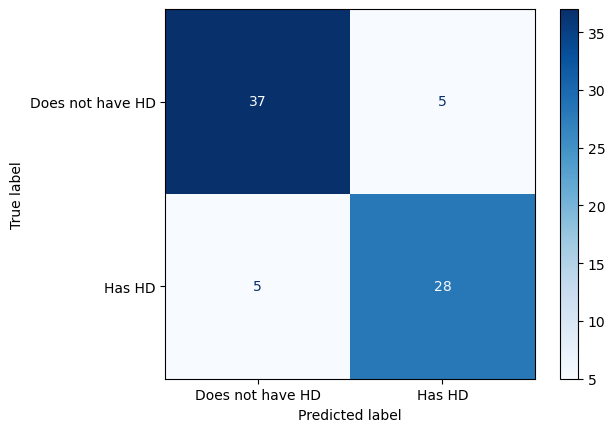

In [162]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,

                      display_labels=['Does not have HD', 'Has HD'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Optimize SVM with Cross Validation

In [163]:
param_grid=[
    {'C': [1, 10, 100, 1000],
    'gamma': [0.01, 0.001],
    'kernel': ['rbf']}
]
optimal_params=GridSearchCV(
                SVC(),
                param_grid,
                cv=5,
                verbose=True)

optimal_params.fit(X_train_scaled, y_train)
optimal_params.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

## Final Support Vector Machine

In [164]:
clf_svm=SVC(random_state=42, C=1, gamma=0.01)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.01, random_state=42)

In [165]:
y_pred=clf_svm.predict(X_test_scaled)

In [166]:
cm=confusion_matrix(y_test, y_pred)

In [167]:
import matplotlib.pyplot as plt

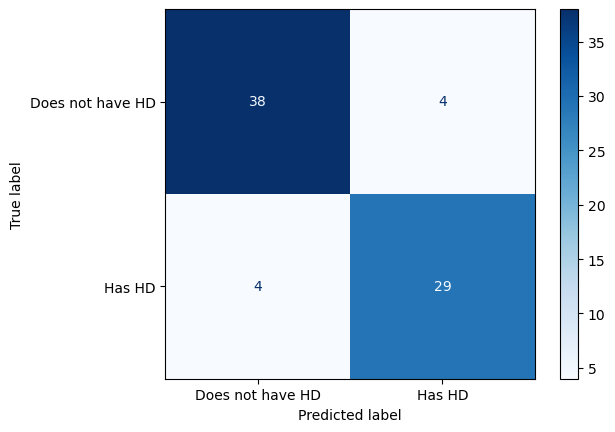

In [168]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,

                      display_labels=['Does not have HD', 'Has HD'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [169]:
len(df.columns)

14

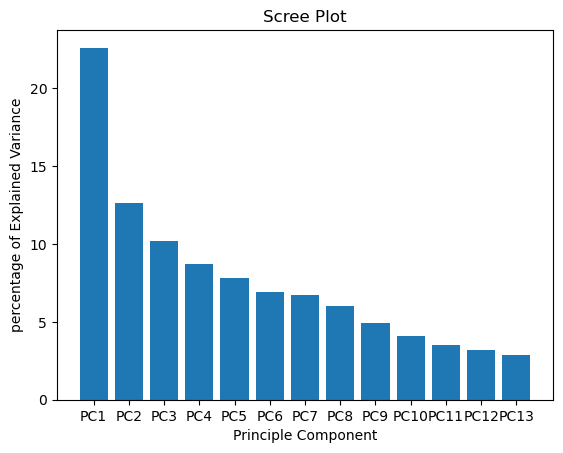

In [170]:
pca=PCA()
X_train_pca=pca.fit_transform(X_train_scaled)

per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=['PC'+str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentage of Explained Variance')
plt.xlabel('Principle Component')
plt.title('Scree Plot')
plt.show()

In [171]:
pc1=X_train_pca[:,0]
pc2=X_train_pca[:, 1]

In [172]:
clf_svm=clf_svm.fit(np.column_stack((pc1,pc2)), y_train)

In [173]:
x_min=pc1.min()-1
x_max=pc1.max()+1

y_min=pc2.min()-1
y_max=pc2.max()+1

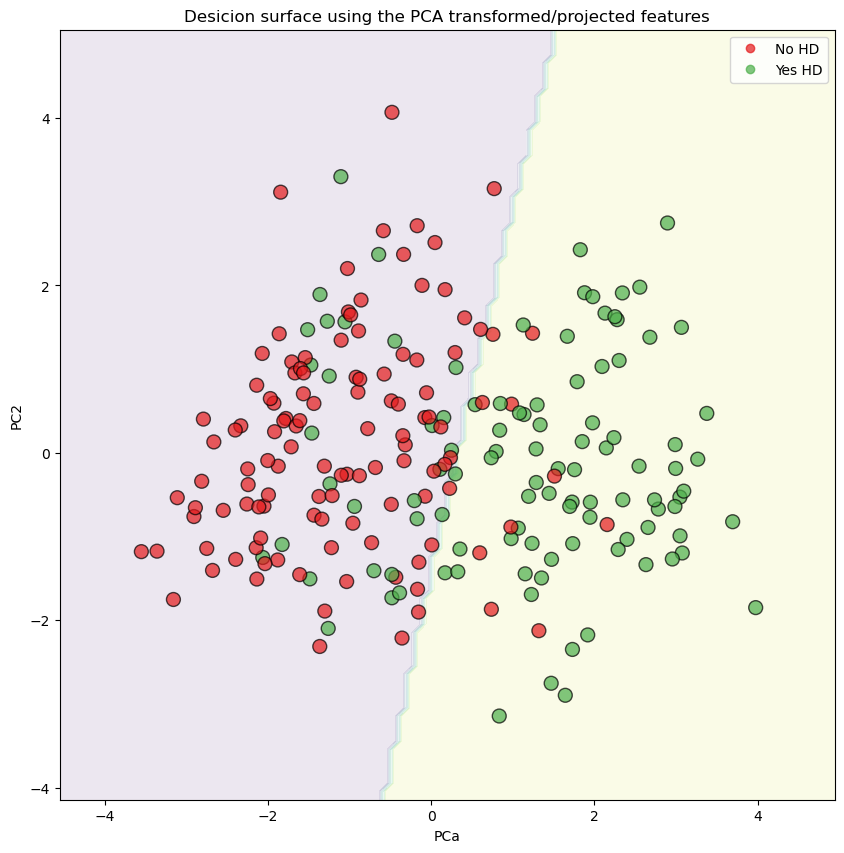

In [174]:
xx, yy=np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                   np.arange(start=y_min, stop=y_max, step=0.1))

Z=clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z=Z.reshape(xx.shape)

fig, ax=plt.subplots(figsize=(10,10))
ax.contourf(xx, yy,Z, alpha=0.1)

cmap=colors.ListedColormap(['#e41a1c', '#4daf4a'])

scatter=ax.scatter(pc1, pc2, c=y_train,
                  cmap=cmap,
                  s=100,
                  edgecolors='k',
                   alpha=0.7
                  )

legend=ax.legend(scatter.legend_elements()[0],
                                        scatter.legend_elements()[1],
                 loc="upper right")

legend.get_texts()[0].set_text("No HD")
legend.get_texts()[1].set_text("Yes HD")

ax.set_ylabel('PC2')
ax.set_xlabel('PCa')
ax.set_title('Desicion surface using the PCA transformed/projected features')
plt.show()
                 
